In [8]:
import pandas as pd
import glob
from os.path import basename, splitext

names = [splitext(basename(x))[0] for x in glob.iglob("../data/pre_evaluation/*.csv")]

dfs = {name: pd.read_csv(f"../data/pre_evaluation/{name}.csv") for name in names }

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

#df['neighbour_size'] = df['neighbour_size'].astype(str)
def plot2x2(name, response):
    _df = dfs[name]
    #_df['_type'] = _df['types'].str[:-2]
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
    
    for i, (name, subdf) in enumerate(_df.groupby(['cleaned', 'weighted'])): 
        _ax = ax=axes[int(i/2),i%2]
        for name2, subdf2 in subdf.groupby(['neighbour_size']): 
            subdf2.plot(x = 'eps', y=response, ax=_ax, label=str(name2), title=f'{name[0]}, {name[1]}')


In [11]:
_df.columns

Index(['types', 'eps', 'top2_ratio', 'no_of_outliers', 'no_of_clusters',
       'relative_position_std_less_than_.1', 'max_cluster_size',
       'min_cluster_size', 'mean_cluster_size', 'skewness_cluster_size',
       'kurtosis_cluster_size', 'median_cluster_size',
       'inter_quartile_range_cluster_size', 'variance_cluster_size',
       'standard_deviation_cluster_size', 'gini', 'token_entropy',
       'position_entropy', 'avg_position_entropy', 'avg_token_entropy',
       'context_size'],
      dtype='object')

interactive(children=(Dropdown(description='name', options=('E_(mathematical_constant)', 'Berlin_Wall', 'Truth…

<function __main__.plot4x3(name)>

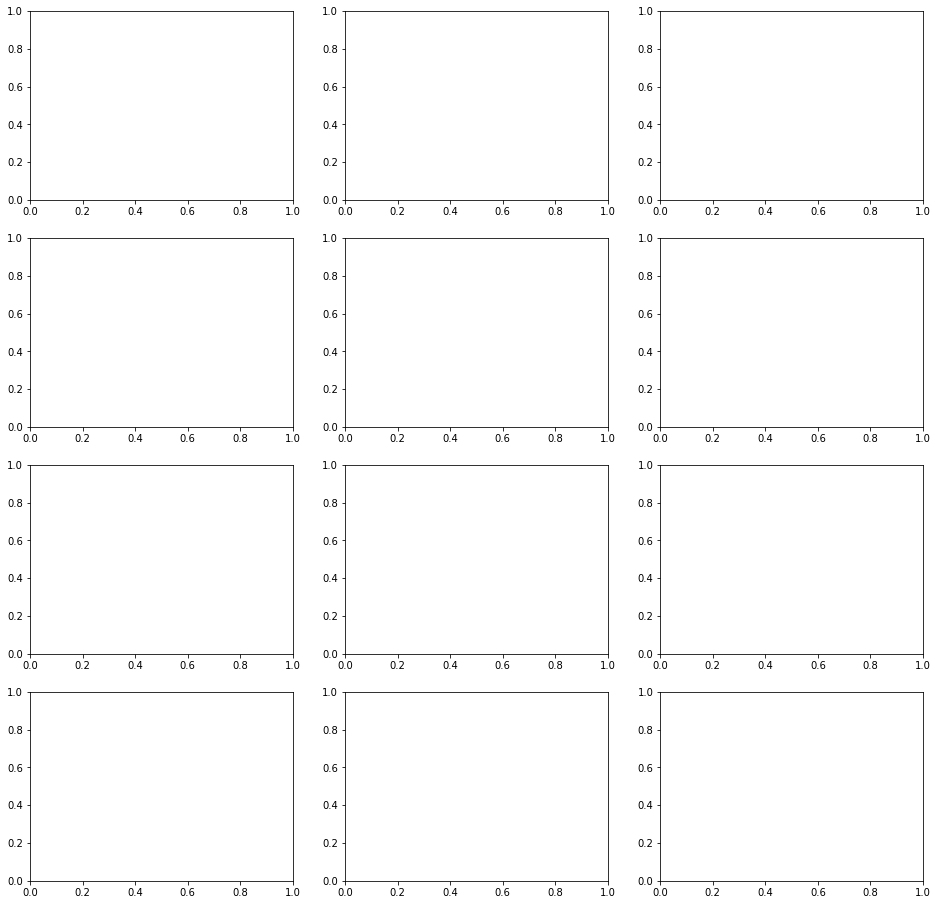

In [9]:
def plot4x3(name):
    global _df
    _df = dfs[name]
    
    if 'cleaned' in _df.columns and 'weighted' in _df.columns:
        subdf = _df[(_df.cleaned=='clean') & (_df.weighted=='weighted')]
    else:
        subdf = _df

    cols = [
        'no_of_clusters', 'no_of_outliers', 'mean_cluster_size',
        'standard_deviation_cluster_size', 'variance_cluster_size', 'max_cluster_size',
        'gini', 'token_entropy','position_entropy',
        'avg_token_entropy','avg_position_entropy'
        
    ]

    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,16))
    for i, column in enumerate(cols):
        if column in subdf.columns:
            _ax = axes[int(i/3),i%3]
            _ax.xaxis.label.set_visible(False)
            if column in ('gini'):
                _ax.yaxis.axes.set_ylim(0,1)
            # if column in ('max_cluster_size', 'variance_cluster_size'):
            #     _ax.yaxis.axes.set_ylim(0,500)
            # elif 'cluster_size' in column and 'skewness' not in column:
            #     _ax.yaxis.axes.set_ylim(0,120)

            for name2, subdf2 in subdf.groupby(['neighbour_size']): 

                subdf2.plot(x = 'eps', y=column, ax=_ax, label=str(name2), title=column, xticks=[.5,1,1.5,2,2.5,3,3.5,4])


widgets.interact(plot4x3, name=names)


In [5]:

def plot5x4(name):
    global _df
    _df = dfs[name]
    
    if 'cleaned' in _df.columns and 'weighted' in _df.columns:
        subdf = _df[(_df.cleaned=='clean') & (_df.weighted=='weighted')]
    else:
        subdf = _df

    cols = [
        'no_of_clusters', 'no_of_outliers', 
        
        'relative_position_std_less_than_.1', 'standard_deviation_cluster_size',
        'mean_cluster_size','variance_cluster_size', 'max_cluster_size', 'min_cluster_size',
        'median_cluster_size', 'inter_quartile_range_cluster_size', 'gini', 'top2_ratio', 
        'skewness_cluster_size', 'kurtosis_cluster_size', 'token_entropy','position_entropy',
        'avg_token_entropy','avg_position_entropy'
    ]

    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,16))
    for i, column in enumerate(cols):
        if column in subdf.columns:
            _ax = axes[int(i/4),i%4]
            _ax.xaxis.label.set_visible(False)
            #_ax.yaxis.axes.set_ylim(0,1)
            # if column in ('max_cluster_size', 'variance_cluster_size'):
            #     _ax.yaxis.axes.set_ylim(0,500)
            # elif 'cluster_size' in column and 'skewness' not in column:
            #     _ax.yaxis.axes.set_ylim(0,120)

            for name2, subdf2 in subdf.groupby(['neighbour_size']): 

                subdf2.plot(x = 'eps', y=column, ax=_ax, label=str(name2), title=column, xticks=[.5,1,1.5,2,2.5,3,3.5,4])


widgets.interact(plot5x4, name=names)

NameError: name 'widgets' is not defined

In [6]:
from ipywidgets import interact
import ipywidgets as widgets

cols = [
    'no_of_clusters', 'no_of_outliers', 'relative_position_std_less_than_.1', 'standard_deviation_cluster_size',
    'mean_cluster_size','variance_cluster_size', 'max_cluster_size', 'min_cluster_size',
    'median_cluster_size', 'inter_quartile_range_cluster_size', 'gini', 'top2_ratio', 
    'skewness_cluster_size', 'kurtosis_cluster_size', 'token_entropy','position_entropy', 
    'avg_token_entropy', 'avg_position_entropy'
]


#widgets.interact(plot2x2, name=names, response=cols)